<h2>Primer modelo</h2>

In [1]:
# To import util functions
import os
import sys
module_path = os.path.abspath(os.path.join('../util'))
if module_path not in sys.path:
    sys.path.append(module_path)

import datasetManager_FF as dM
import cleaner_FF as cl
import transformer_FF as tr
import modeler_FF as md

In [2]:
#Common libraries for work with data
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats


# np.set_printoptions(threshold=sys.maxsize)

#Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Model libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Model training libraries
from sklearn.model_selection import train_test_split

#Metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

#Other
import pickle

/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
# Cargo el dataset
df = dM.cargar_datos(0.1)

In [4]:
# Limpia el dataset
cleaner = cl.Cleaner()
df = cleaner.clean_all(df)

In [5]:
# Transforma el dataset
transformer = tr.Transformer()
df = transformer.transform_all(df)

In [6]:
# Carga, limpia y transforma el dataset de validacion
validation = pd.read_csv('../datos/evaluation.csv')
validation = cleaner.clean_all(validation)
validation = transformer.transform_all(validation,df)

In [ ]:
modelador = md.Modeler()

In [7]:
features = df.loc[:, df.columns != 'Label']
labels = df.loc[:, df.columns == 'Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#tree_clf = DecisionTreeClassifier()

#tree_clf = RandomForestClassifier()

#tree_clf = XGBClassifier()

"""
tree_clf = LGBMClassifier(n_estimators = 100, 
                       learning_rate = 0.3,
                       #max_features=8,
                       max_depth = 10, 
                       #num_leaves = 50,
                       min_data_in_leaf = 8,
                       min_sample_split = 13,
                       boosting_type = 'dart',
                       metric='auc',
                       random_state=42
                      )
"""


tree_clf = RandomForestClassifier(max_depth=15, 
                                  min_samples_leaf=8, 
                                  min_samples_split=13,
                                  random_state=42)

tree_clf.fit(X_train, y_train)

/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/fraferrari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

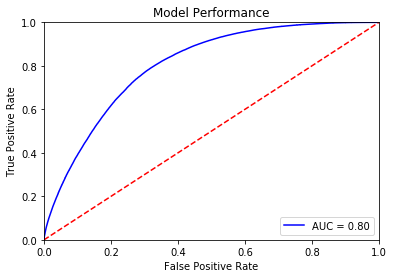

In [9]:
modelador.plot_roc(tree_clf,X_train,y_train)

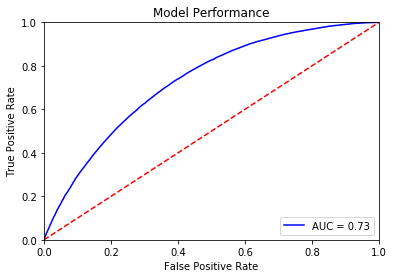

In [10]:
modelador.plot_roc(tree_clf,X_test,y_test)

In [12]:
modelador.plot_confusion_matrix(tree_clf,X_train,y_train)

[[311983     91]
 [ 71606    581]]


In [13]:
modelador.plot_confusion_matrix(tree_clf,X_test,y_test)

[[133751     95]
 [ 30730    108]]


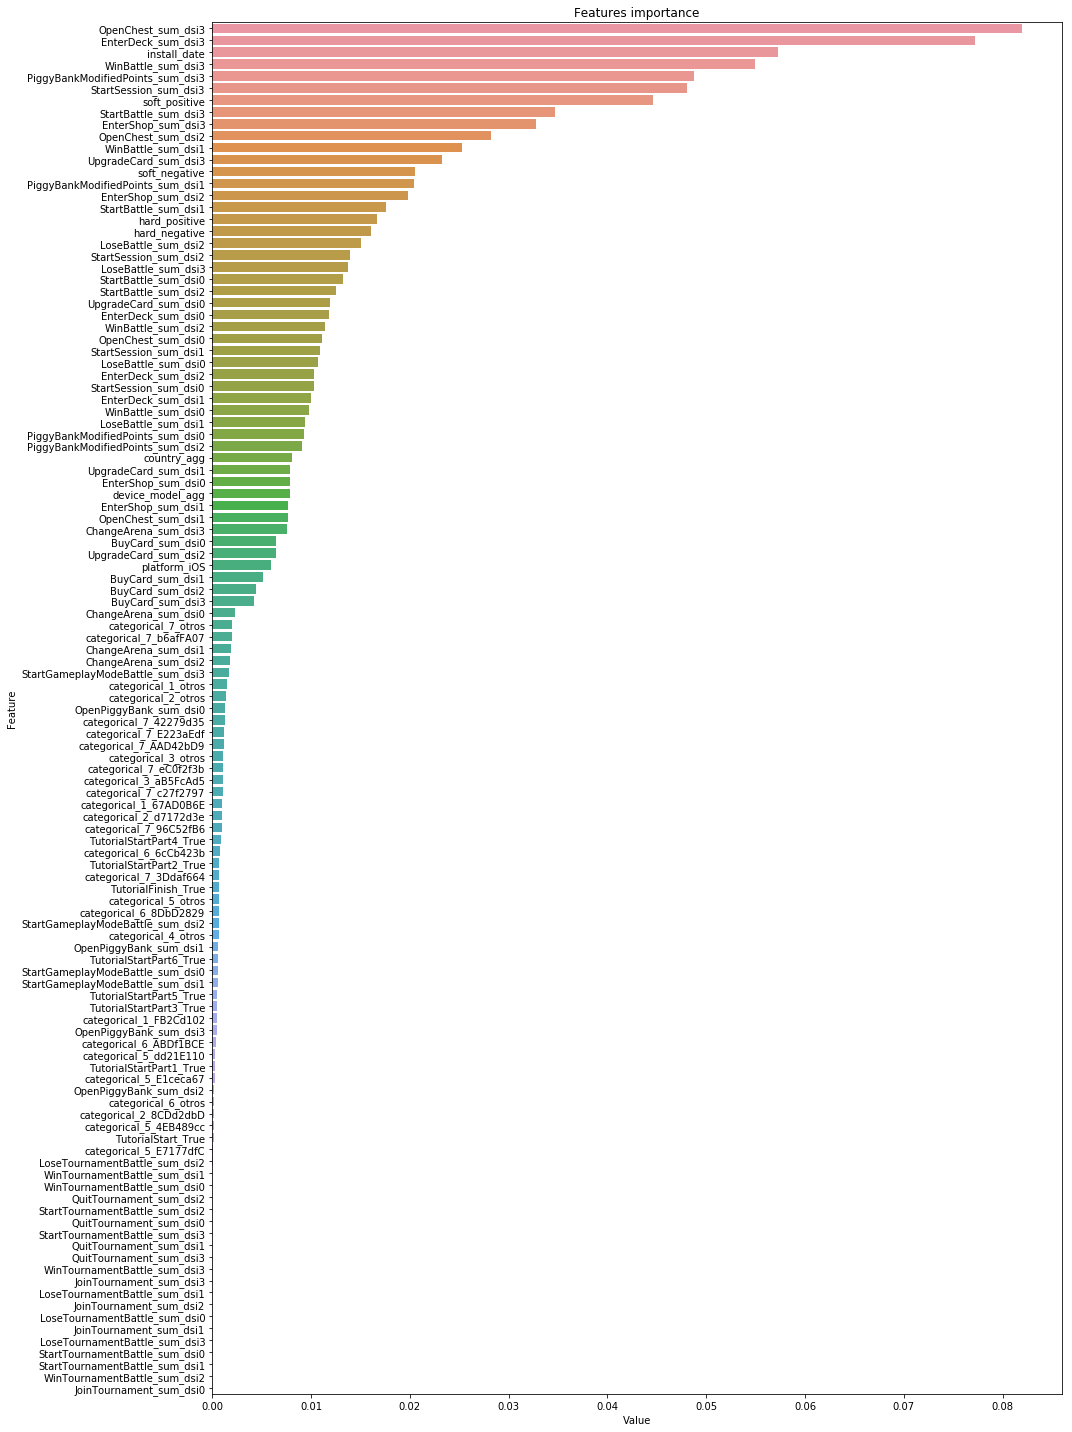

In [28]:
modelador.plot_feature_importance(tree_clf,X_train)

In [14]:
# Predice 
probs = tree_clf.predict_proba(validation)
# Guarda resultados sobre validacion
md.guardar_submit(probs,"resultados")

In [ ]:
# guardar modelo (pickle)
md.guardar_modelo(modelo,"nombreModelo")
# levantar modelo (pickle)
modelo = md.abrir_modelo("nombreModelo")

In [ ]:
# Ejemplo de tuner con "tunner_grid()"
model = RandomForestClassifier()
n_folds = 3

# Develop a grid with the most important features for Random Forest    
params = {
    "max_depth":[10,13,15], # Maximum number of levels in tree
    "max_features": ['auto', 0.3, 0.6, 0.9], # Number of features to consider at every split
    "min_samples_leaf": [1,3,4,6], # Minimum amount of samples to create a leaf
    "min_samples_split": [2,6,12,24], # Minimum amount of samples to split a node
    "max_leaf_nodes": [100, 1000, 3000], # Maximum amount of leaf by node
    "bootstrap": [True, False], # Method of selecting samples for training each tree
    "n_estimators": [10,100,1000,5000], # Number of trees in random forest
    }
 
                
features = dataset.iloc[:,1:]
labels = dataset.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

result_trainGrid = md.tunner_grid(model, params, X_train, y_train, n_folds)

<h2>Ingenieria de atributos</h2>

In [1]:
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
lista_columnas_num = list(df.select_dtypes(include=['int64','float64']).columns)
df_aux = df[lista_columnas_num]
df[lista_columnas_num] = df_aux[(np.abs(stats.zscore(df_aux)) < 3).all(axis=1)] # Remove outliers
z = np.abs(stats.zscore(df[lista_columnas_num]))
print(z)

#df["abv"].apply(np.log)